## *EXPLORATORY DATA ANALYSIS(EDA)*

In [1]:
# import libraries
import pandas  as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
# load Dataset
data = pd.read_csv("employees.csv")

In [3]:
'''
Let’s read the dataset using the Pandas module and

print the 1st five rows. To print the first

five rows we will use the head() function.'''

data.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services


In [4]:
# getting insights of the data

data.shape

(1000, 8)

This means that this dataset has 1000 rows and 8 columns.

In [5]:
# Let’s get a quick summary of the dataset using the describe() method

data.describe()

,Salary,Bonus %
count,1000.000000,1000.000000
mean,90662.181000,10.207555
std,32923.693342,5.528481
min,35013.000000,1.015000
25%,62613.000000,5.401750
50%,90428.000000,9.838500
75%,118740.250000,14.838000
max,149908.000000,19.944000


In [6]:
# by default it can show only numeric columns statistics .

# we can see categorical features by tunning parameteres

data.describe(exclude=np.number)

,First Name,Gender,Start Date,Last Login Time,Senior Management,Team
count,933,855,1000,1000,933,957
unique,200,2,972,720,2,10
top,Marilyn,Female,5/12/2009,1:35 PM,True,Client Services
freq,11,431,2,5,468,106


In [7]:
# let's see the columns and data types

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   First Name         933 non-null    object 
 1   Gender             855 non-null    object 
 2   Start Date         1000 non-null   object 
 3   Last Login Time    1000 non-null   object 
 4   Salary             1000 non-null   int64  
 5   Bonus %            1000 non-null   float64
 6   Senior Management  933 non-null    object 
 7   Team               957 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


## **Handling Missing Values**

In [8]:
# let’s check if there are any missing values in our dataset or not.

data.isna().sum()

First Name            67
Gender               145
Start Date             0
Last Login Time        0
Salary                 0
Bonus %                0
Senior Management     67
Team                  43
dtype: int64

'''We can see that every column has a different
amount of missing values. Like Gender as 145 missing 
values and salary has 0. Now for handling these missing
values there can be several cases like dropping the rows
containing NaN or replacing NaN with either mean,
median, mode, or some other value.'''

In [10]:
# Now, let’s try to fill the missing values of gender with the string “No Gender”

data.Gender.fillna("No Gender", inplace=True)

data.isna().sum()

First Name           67
Gender                0
Start Date            0
Last Login Time       0
Salary                0
Bonus %               0
Senior Management    67
Team                 43
dtype: int64

'''We can see that now there is no null
value for the gender column. Now, Let’s 
fill the senior management with the mode value.'''

In [20]:
mode = data['Senior Management'].mode().values[0]
data['Senior Management'].replace(np.NaN, mode, inplace=True)

data.isna().sum()

First Name           67
Gender                0
Start Date            0
Last Login Time       0
Salary                0
Bonus %               0
Senior Management     0
Team                 43
dtype: int64

'''Now for the first name and team,
we cannot fill the missing values with
arbitrary data, so, let’s drop all the
rows containing these missing values.'''

In [22]:
data.dropna(axis=0, how='any', inplace=True)

data.isna().sum()

First Name           0
Gender               0
Start Date           0
Last Login Time      0
Salary               0
Bonus %              0
Senior Management    0
Team                 0
dtype: int64

In [23]:
data.shape

(899, 8)

'''We can see that our dataset is

now free of all the missing values

and after dropping the data the number

of also reduced from 1000 to 899.'''

## **VISUALIZATION**

After removing the missing data let’s visualize our data.

'''Data Visualization is the process of analyzing data 
in the form of graphs or maps, making it a lot easier
to understand the trends or patterns in the data. There
are various types of visualizations –

Univariate analysis,

bi variate analysis and 

multi variate analysis'''

'''we can use seaborn and matplotlib library for data visualization'''

In [24]:
# Histogram

"it can be used for both univariate and multivariate analysis"

'it can be used for both univariate and multivariate analysis'

In [25]:
import seaborn as sns

import matplotlib.pyplot as plt

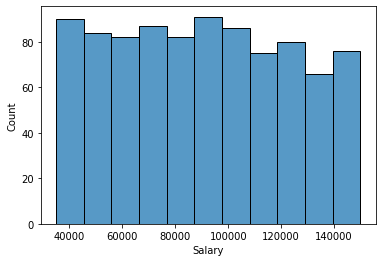

In [27]:
sns.histplot(x='Salary', data =data)
plt.show();

#Boxplot

it can also be used for univariate and bi-variate analysis

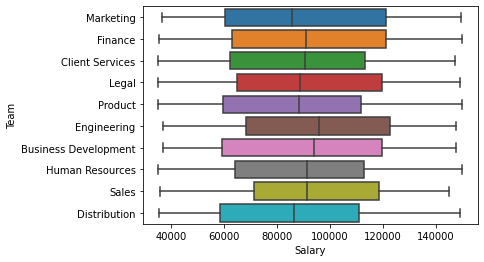

In [28]:
sns.boxplot(x='Salary', y='Team', data=data)
plt.show();

# Scatter plot

it can be used for bi variate analysis

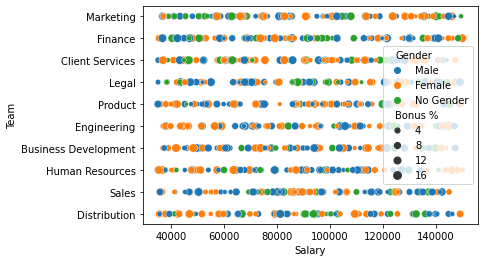

In [31]:
sns.scatterplot(x='Salary', y='Team', data = data, hue = 'Gender', size = 'Bonus %')
plt.show();

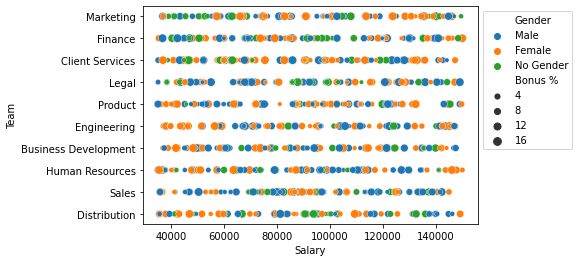

In [32]:
sns.scatterplot(x='Salary', y='Team', data = data, hue = 'Gender', size = 'Bonus %')

# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
  
plt.show();

# Pairplot

For multivariate analysis,
we can use the pairplot()method of seaborn module.
We can also use it for the multiple pairwise bivariate
distributions in a dataset.

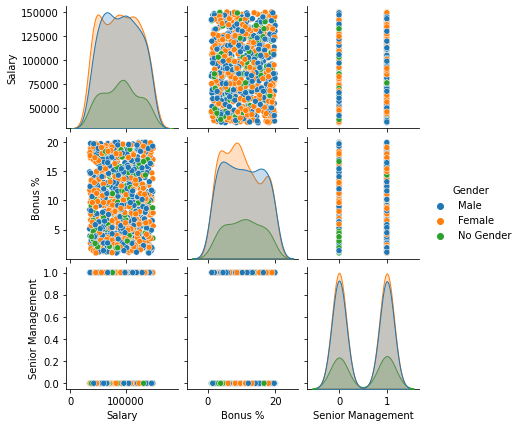

In [36]:
sns.pairplot(data, hue='Gender', height=2)
plt.show()